# Logistic Regression

### Initial Installations

Installing the packages - using dataframes, forming modals and reporting accuracy

In [1]:
#import initial programmes

import pandas as pd #making dataframes
import numpy as np #making arrays
import sklearn as sk #machine learning
import seaborn as sns #plots
import matplotlib.pylab as plt #plots
import matplotlib.pyplot as pyplt #plots
from sklearn.linear_model import LogisticRegression #import model
from sklearn import metrics #for accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


In [7]:

def get_ds_infos():
    ## 0:Code, 1:Weight, 2:Height, 3:Age, 4:Gender
    dss = np.genfromtxt("data_subjects_info.csv",delimiter=',')
    dss = dss[1:]
    print("----> Data subjects information is imported.")
    return dss #read data subjects CSV file
ds_list = get_ds_infos()

def create_time_series(num_features, num_act_labels, num_gen_labels, label_codes, trial_codes):
    dataset_columns = num_features+num_act_labels+num_gen_labels
    ds_list = get_ds_infos() #information about the participants
    train_data = np.zeros((0,dataset_columns)) #making initial array
    test_data = np.zeros((0,dataset_columns))
    for i, sub_id in enumerate(ds_list[:,0]):
        for j, act in enumerate(label_codes):
            for trial in trial_codes[act]:
                fname ='motionsense-dataset/A_DeviceMotion_data/'+act+'_'+str(trial)+'/sub_'+str(int(sub_id))+'.csv'
                raw_data = pd.read_csv(fname)
                raw_data = raw_data.drop(['Unnamed: 0'], axis=1) #drop first column
                unlabel_data = raw_data.values #need to lavel the data for training
                label_data = np.zeros((len(unlabel_data), dataset_columns))
                label_data[:,:-(num_act_labels + num_gen_labels)] = unlabel_data
                label_data[:,label_codes[act]] = 1 #if that activity is included, 1 in column
                label_data[:,-(num_gen_labels)] = int(ds_list[i,4]) #picking the gender column
                ## long trials = training dataset Short trials = test dataset
                if trial > 10: #training data is later trials
                    test_data = np.append(test_data, label_data, axis = 0)
                else:    
                    train_data = np.append(train_data, label_data, axis = 0)
    return train_data , test_data #returns the two datasets - rows of individual results for each time stamp
print("--> Start...")
## Here we set parameter to build labeld time-series from dataset of "(A)DeviceMotion_data"
num_features = 12 # attitude(roll, pitch, yaw); gravity(x, y, z); rotationRate(x, y, z); userAcceleration(x,y,z)
num_act_labels = 6 # dws, ups, wlk, jog, sit, std
num_gen_labels = 1 # 0/1(female/male)
label_codes = {"dws":num_features, "ups":num_features+1, "wlk":num_features+2, "jog":num_features+3, "sit":num_features+4, "std":num_features+5}
trial_codes = {"dws":[1,2,11], "ups":[3,4,12], "wlk":[7,8,15], "jog":[9,16], "sit":[5,13], "std":[6,14]}    
## Use'create_time_series()' to build time-series
print("--> Building Training and Test Datasets...")
train_ts, test_ts = create_time_series(num_features, num_act_labels, num_gen_labels, label_codes, trial_codes)
print("--> Shape of Training Time-Seires:", train_ts.shape)
print("--> Shape of Test Time-Series:", test_ts.shape)



----> Data subjects information is imported.
--> Start...
--> Building Training and Test Datasets...
----> Data subjects information is imported.
--> Shape of Training Time-Seires: (1081446, 19)
--> Shape of Test Time-Series: (331419, 19)


### Designing the model

The aim of this model was to establish the first model: Linear Regression. Initially, the training and testing datasets were set up containing data regarding all activities from the complete dataset, before the model was trained. It then provided a prediction from the test dataset

In [9]:
TestDF = pd.DataFrame(train_ts) #personal preference - Pandas is clearer/easier to use based on experience in R
TrainDF = pd.DataFrame(train_ts)              
lr = LogisticRegression() #defining model
features= range(0,18) #columns to include in training

#define test and train datasets
x_test = TestDF[features]
y_test = TestDF[18]
x_train = TrainDF[features]
y_train = TrainDF[18]

lr.fit(x_train, y_train) #fitting the model to training data
Log_predictions = lr.predict(x_test) #making predictions from the test data
Y_Predictions = Log_predictions
Y_True = y_test


C:\Users\b9054751\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Assessing the model

This model was than assessed with the following accuracy scores

In [10]:
print("Accuracy:",metrics.accuracy_score(Y_True, Y_Predictions)) 
print('Precision: %.3f' % precision_score(Y_True, Y_Predictions))  
print('Recall: %.3f' % recall_score(Y_True, Y_Predictions)) 
print('F1: %.3f' % f1_score(Y_True, Y_Predictions))

Accuracy: 0.5321689663654033
Precision: 0.563
Recall: 0.807
F1: 0.663


This model was then repeated for specific groups of data, as it was split into the four activities by specifying a specific group at the start of each attempt

In [5]:
Train = train_ts[train_ts[:,17]==1] #set out datasets (in this case, only standing)
Test = test_ts[test_ts[:,17]==1]

### Visualising Levels of Accuracy

Text(0.5, 15.0, 'Predicted label')

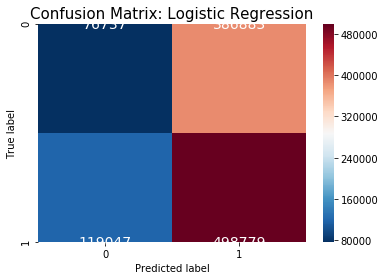

In [6]:
#Form a confusion matrix from test data and preditions
sns.heatmap(confusion_matrix(Y_True, Y_Predictions),annot=True, annot_kws={"size": 14},fmt='3.0f',cmap="RdBu_r")
plt.title('Confusion Matrix: Logistic Regression', y=1.05, size=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')


This confusion matrix reflects the accuracy of the data; top left is true positive, bottom right is true negative, top right is false positive, bottom left is false negative